# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


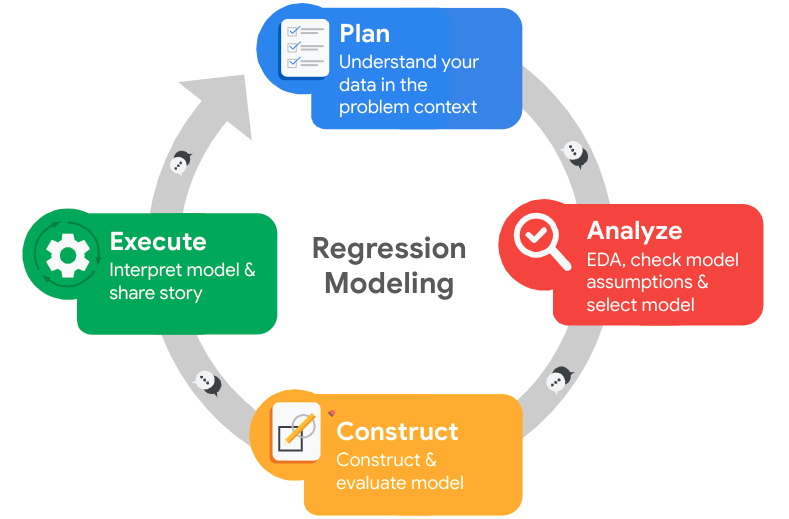

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Salifort Motors.
2. The goal is to develop a predictive model to anticipate employee churn at Salifort Motors, which can help the company understand and mitigate factors leading to turnover.
3. Initial observations show potential correlations between satisfaction level, number of projects, and years at the company with the likelihood of an employee leaving.
4. Resources include Python libraries for data analysis and machine learning (pandas, numpy, scikit-learn), and online tutorials/documentation for these tools (see Jupyter notebook for all apps).
5. Ethical considerations include ensuring data privacy and security, avoiding bias in the model, and transparently communicating the use and limitations of the predictive model.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [118]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import xgboost as xgb
import pickle
import shap

from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Custom sfmotors colors
sfmotors_blue = '#007CFF'
sfmotors_yellow = '#FFB900'
sfmotors_green = '#52CC52'
sfmotors_red = '#FF3B30'
sfmotors_green_darker = '#285128'
sfmotors_red_darker = '#B22B24'

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [68]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [69]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [70]:
# Gather descriptive statistics about the data
df0.describe(include='all')

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [71]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [72]:
# Rename columns to snake_case and correct any misspelled names
df0.rename(columns={
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation',
    'number_project': 'number_of_projects',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'years_at_company',
    'Work_accident': 'work_accident',
    'left': 'left_company',
    'promotion_last_5years': 'promotion_last_5_years',
    'Department': 'department',
    'salary': 'salary'
}, inplace=True)


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident',
       'left_company', 'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [73]:
# Check for missing values
df0.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_of_projects        0
average_monthly_hours     0
years_at_company          0
work_accident             0
left_company              0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [74]:
# Check for duplicates
duplicates = df0.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 3008


In [75]:
# Inspect some rows containing duplicates as needed
duplicates_rows = df0[df0.duplicated()]
duplicates_rows.head(10)

satisfaction_level  last_evaluation  number_of_projects  \
396                  0.46             0.57                   2   
866                  0.41             0.46                   2   
1317                 0.37             0.51                   2   
1368                 0.41             0.52                   2   
1461                 0.42             0.53                   2   
1516                 0.40             0.50                   2   
1616                 0.37             0.46                   2   
1696                 0.39             0.56                   2   
1833                 0.10             0.85                   6   
12000                0.38             0.53                   2   

       average_monthly_hours  years_at_company  work_accident  left_company  \
396                      139                 3              0             1   
866                      128                 3              0             1   
1317                     127                 3              0             1   
1368                     132                 3              0             1   
1461                     142                 3              0             1   
1516                     127                 3              0             1   
1616                     156                 3              0             1   
1696                     160                 3              0             1   
1833                     266                 4              0             1   
12000                    157                 3              0             1   

       promotion_last_5_years  department  salary  
396                         0       sales     low  
866                         0  accounting     low  
1317                        0       sales  medium  
1368                        0       RandD     low  
1461                        0       sales     low  
1516                        0          IT     low  
1616                        0       sales     low  
1696                        0       sales     low  
1833                        0       sales     low  
12000                       0       sales     low

In [76]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df.head(10)

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   
5                0.41             0.50                   2   
6                0.10             0.77                   6   
7                0.92             0.85                   5   
8                0.89             1.00                   5   
9                0.42             0.53                   2   

   average_monthly_hours  years_at_company  work_accident  left_company  \
0                    157                 3              0             1   
1                    262                 6              0             1   
2                    272                 4              0             1   
3                    223                 5              0             1   
4                    159                 3              0             1   
5                    153                 3              0             1   
6                    247                 4              0             1   
7                    259                 5              0             1   
8                    224                 5              0             1   
9                    142                 3              0             1   

   promotion_last_5_years department  salary  
0                       0      sales     low  
1                       0      sales  medium  
2                       0      sales  medium  
3                       0      sales     low  
4                       0      sales     low  
5                       0      sales     low  
6                       0      sales     low  
7                       0      sales     low  
8                       0      sales     low  
9                       0      sales     low

### Check outliers

Check for outliers in the data.

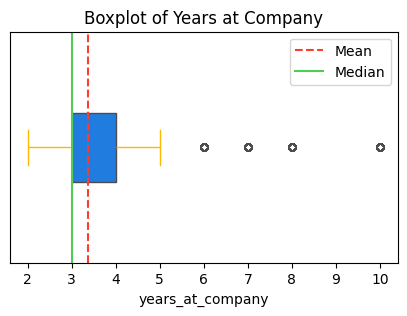

In [77]:
# Create a boxplot to visualize distribution of `tenure` (`years_at_company`) and detect any outliers
def sfmotors_box_plot(data, column, title, rmoutliers=True, **kwargs):
    """
    This function creates a box plot of a specified column in a pandas DataFrame,
    highlighting potential outliers identified using z-scores.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to be visualized.
        title (str): The title for the plot.
        rmoutliers (bool, optional): Flag to remove half of the outliers from the plot 
            for better visualization (defaults to True). If False, outliers are 
            visually shown on the graph. If provided a number, it will set manually 
            the length for the Y axis.
        **kwargs: Additional arguments passed to seaborn.boxplot

    Returns:
        None
    """
        
    # Calculate mean and median
    mean_value = data[column].mean()
    median_value = data[column].median()

    try:
        # Calculate z-scores
        z_scores = (data[column] - mean_value) / data[column].std()
        # Identify and sort outliers (absolute z-score > 3)
        outliers = data[column][np.abs(z_scores) > 3].sort_values(ascending=True)
        # Select the first half (rounded down) of outliers
        quarter_outliers = outliers.iloc[int(len(outliers) * 0.5) - 1]
    except IndexError:
        outliers = []

    # Create Box plot with Seaborn
    fig = plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[column],
                orient='h',  # Set horizontal orientation
                color=sfmotors_blue,  # Box color
                width=0.3,  # Box width
                whiskerprops=dict(color=sfmotors_yellow),  # Whisker color
                capprops=dict(color=sfmotors_yellow),  # Cap color
                medianprops=dict(color=sfmotors_green),  # Median line color
                flierprops=dict(marker='o', color=sfmotors_yellow, markersize=5), # Outlier color
                **kwargs) # from the sns.boxplot() function

    # Customize the plot
    plt.yticks([])  # Remove the y-axis ticks
    plt.ylabel('')  # Remove the y-axis label
    plt.title(title)

    # Plot out outliers as different markers (optional)
    if len(outliers) > 0 and rmoutliers == True:
        plt.gca().spines['right'].set_visible(False) # Remove left line to be substituted by yellow dotted
        plt.xlim(0, quarter_outliers)  # Set the limits of the X axis to omit part of the outliers
        cut_line = plt.axvline(x=quarter_outliers, color=sfmotors_yellow, linestyle='--', label='Outlier Cut')  # Add a vertical line to indicate the cut
        plt.legend(handles=[cut_line])  # Add only the cut line to the legend
    elif rmoutliers != True and rmoutliers != False:
        plt.gca().spines['right'].set_visible(False) # Remove left line to be substituted by yellow dotted
        plt.xlim(0, rmoutliers)  # Set the limits of the X axis to omit part of the outliers
        plt.axvline(x=rmoutliers, color=sfmotors_yellow, linestyle='--')  # Add a vertical line to indicate the cut
        cut_line = plt.axvline(x=rmoutliers, color=sfmotors_yellow, linestyle='--', label='Outlier Cut')  # Add a vertical line to indicate the cut
        plt.legend(handles=[cut_line])  # Add only the cut line to the legend

    # Add lines for mean and median
    plt.axvline(x=mean_value, color=sfmotors_red, linestyle='--', label='Mean')
    plt.axvline(x=median_value, color=sfmotors_green, linestyle='-', label='Median')

    # Add legend
    plt.legend()

    # Render
    plt.show()
    
sfmotors_box_plot(df, "years_at_company", 'Boxplot of Years at Company', rmoutliers=False)

In [78]:
# Calculate IQR for 'years_at_company'
iqr_value = iqr(df['years_at_company'])

# Calculate lower and upper bounds for outliers
lower_bound = np.percentile(df['years_at_company'], 25) - 1.5 * iqr_value
upper_bound = np.percentile(df['years_at_company'], 75) + 1.5 * iqr_value

# Identify outliers
outliers = df[(df['years_at_company'] < lower_bound) | (df['years_at_company'] > upper_bound)]
num_outliers = outliers.shape[0]

# Determine the number of rows containing outliers
print(f"Number of outliers in 'years_at_company': {num_outliers}")

Number of outliers in 'years_at_company': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. There is a strong relationship between employee satisfaction levels and their likelihood of leaving the company. Other significant variables include the number of projects and years at the company.
2. The data distributions indicate that most employees have moderate satisfaction levels, and there are varying numbers of projects and years at the company among employees.
3. Transformations include scaling numerical features to standardize them and creating interaction terms to capture the combined effects of satisfaction and salary, as well as satisfaction and department. Futhermore, it was removed duplicated values and changed the columns names.
4. EDA helps identify relationships between variables, understand data distributions, detect outliers, and decide on necessary data transformations.
5. Resources include Python libraries for EDA (pandas, matplotlib, seaborn).
6. Ensuring that the analysis does not reinforce or introduce biases and that any findings are used responsibly within the company.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [79]:
# Get numbers of people who left vs. stayed
left_counts = df['left_company'].value_counts()
print(f"Number of people who left vs. stayed:\n{left_counts}\n")

# Get percentages of people who left vs. stayed
left_percentages = df['left_company'].value_counts(normalize=True) * 100
print(f"Percentages of people who left vs. stayed:\n{left_percentages}")

Number of people who left vs. stayed:
left_company
0    10000
1     1991
Name: count, dtype: int64

Percentages of people who left vs. stayed:
left_company
0    83.39588
1    16.60412
Name: proportion, dtype: float64


In [80]:
# Generate a correlation matrix
df1 = df.select_dtypes(include=[np.number])
df1.corr(method='pearson')


satisfaction_level  last_evaluation  \
satisfaction_level                1.000000         0.095186   
last_evaluation                   0.095186         1.000000   
number_of_projects               -0.133246         0.270256   
average_monthly_hours            -0.006252         0.264678   
years_at_company                 -0.152915         0.096829   
work_accident                     0.039940        -0.005695   
left_company                     -0.350558         0.013520   
promotion_last_5_years            0.019789        -0.007206   

                        number_of_projects  average_monthly_hours  \
satisfaction_level               -0.133246              -0.006252   
last_evaluation                   0.270256               0.264678   
number_of_projects                1.000000               0.331516   
average_monthly_hours             0.331516               1.000000   
years_at_company                  0.188837               0.102875   
work_accident                    -0.005612              -0.012860   
left_company                      0.030928               0.070409   
promotion_last_5_years           -0.000544              -0.004964   

                        years_at_company  work_accident  left_company  \
satisfaction_level             -0.152915       0.039940     -0.350558   
last_evaluation                 0.096829      -0.005695      0.013520   
number_of_projects              0.188837      -0.005612      0.030928   
average_monthly_hours           0.102875      -0.012860      0.070409   
years_at_company                1.000000       0.000003      0.173295   
work_accident                   0.000003       1.000000     -0.125436   
left_company                    0.173295      -0.125436      1.000000   
promotion_last_5_years          0.056828       0.029852     -0.044657   

                        promotion_last_5_years  
satisfaction_level                    0.019789  
last_evaluation                      -0.007206  
number_of_projects                   -0.000544  
average_monthly_hours                -0.004964  
years_at_company                      0.056828  
work_accident                         0.029852  
left_company                         -0.044657  
promotion_last_5_years                1.000000

In [81]:
df1.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left_company  \
0                    157                 3              0             1   
1                    262                 6              0             1   
2                    272                 4              0             1   
3                    223                 5              0             1   
4                    159                 3              0             1   

   promotion_last_5_years  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [82]:
# Encode categorical variables to dummies.
df_model = pd.get_dummies(df, columns = ['department', 'salary'])
df_model.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left_company  \
0                    157                 3              0             1   
1                    262                 6              0             1   
2                    272                 4              0             1   
3                    223                 5              0             1   
4                    159                 3              0             1   

   promotion_last_5_years  department_IT  department_RandD  ...  \
0                       0          False             False  ...   
1                       0          False             False  ...   
2                       0          False             False  ...   
3                       0          False             False  ...   
4                       0          False             False  ...   

   department_hr  department_management  department_marketing  \
0          False                  False                 False   
1          False                  False                 False   
2          False                  False                 False   
3          False                  False                 False   
4          False                  False                 False   

   department_product_mng  department_sales  department_support  \
0                   False              True               False   
1                   False              True               False   
2                   False              True               False   
3                   False              True               False   
4                   False              True               False   

   department_technical  salary_high  salary_low  salary_medium  
0                 False        False        True          False  
1                 False        False       False           True  
2                 False        False       False           True  
3                 False        False        True          False  
4                 False        False        True          False  

[5 rows x 21 columns]

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

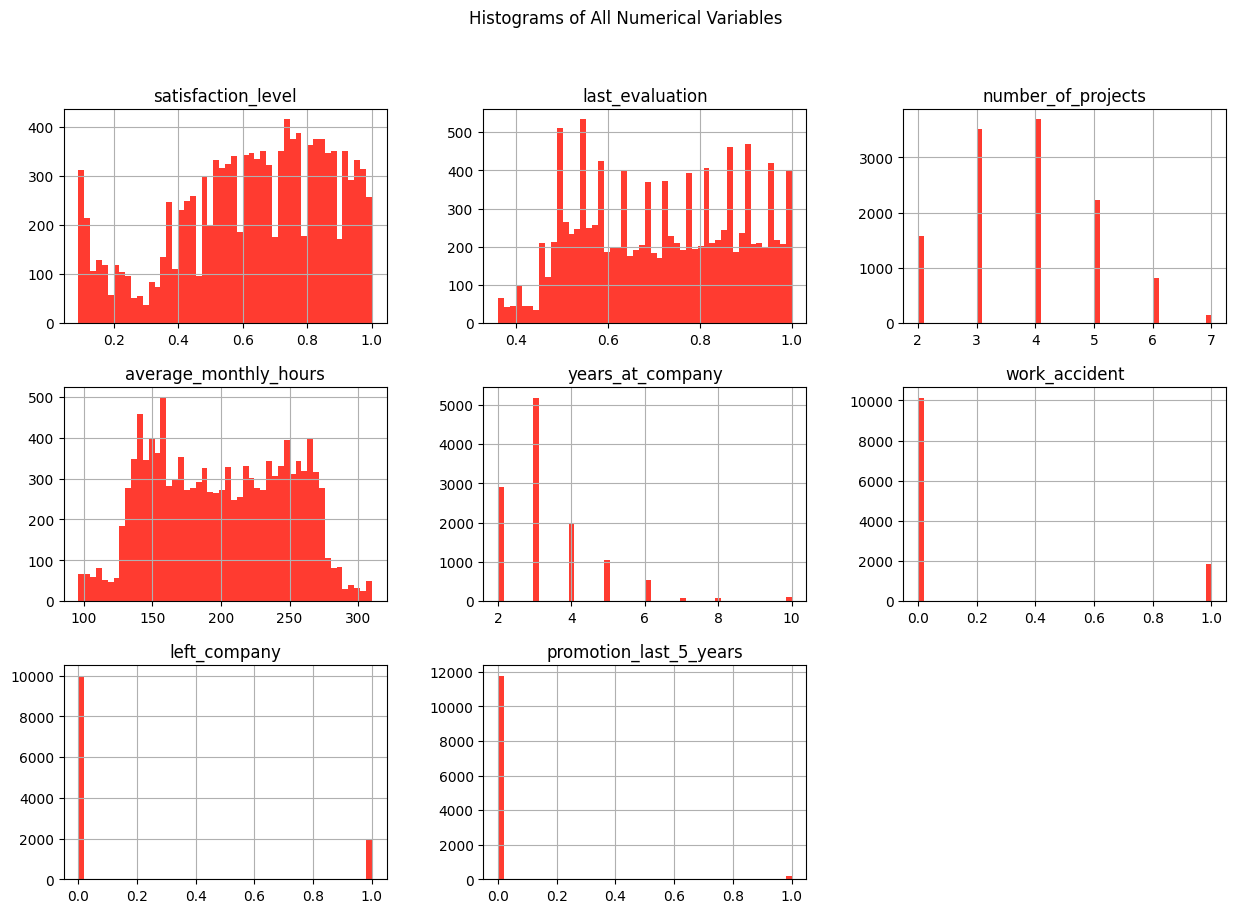

In [83]:
# Create a plot as needed
# Create a histogram for all numerical variables
df.hist(bins=50, figsize=(15, 10), color=[sfmotors_red])
plt.suptitle('Histograms of All Numerical Variables')
plt.show()

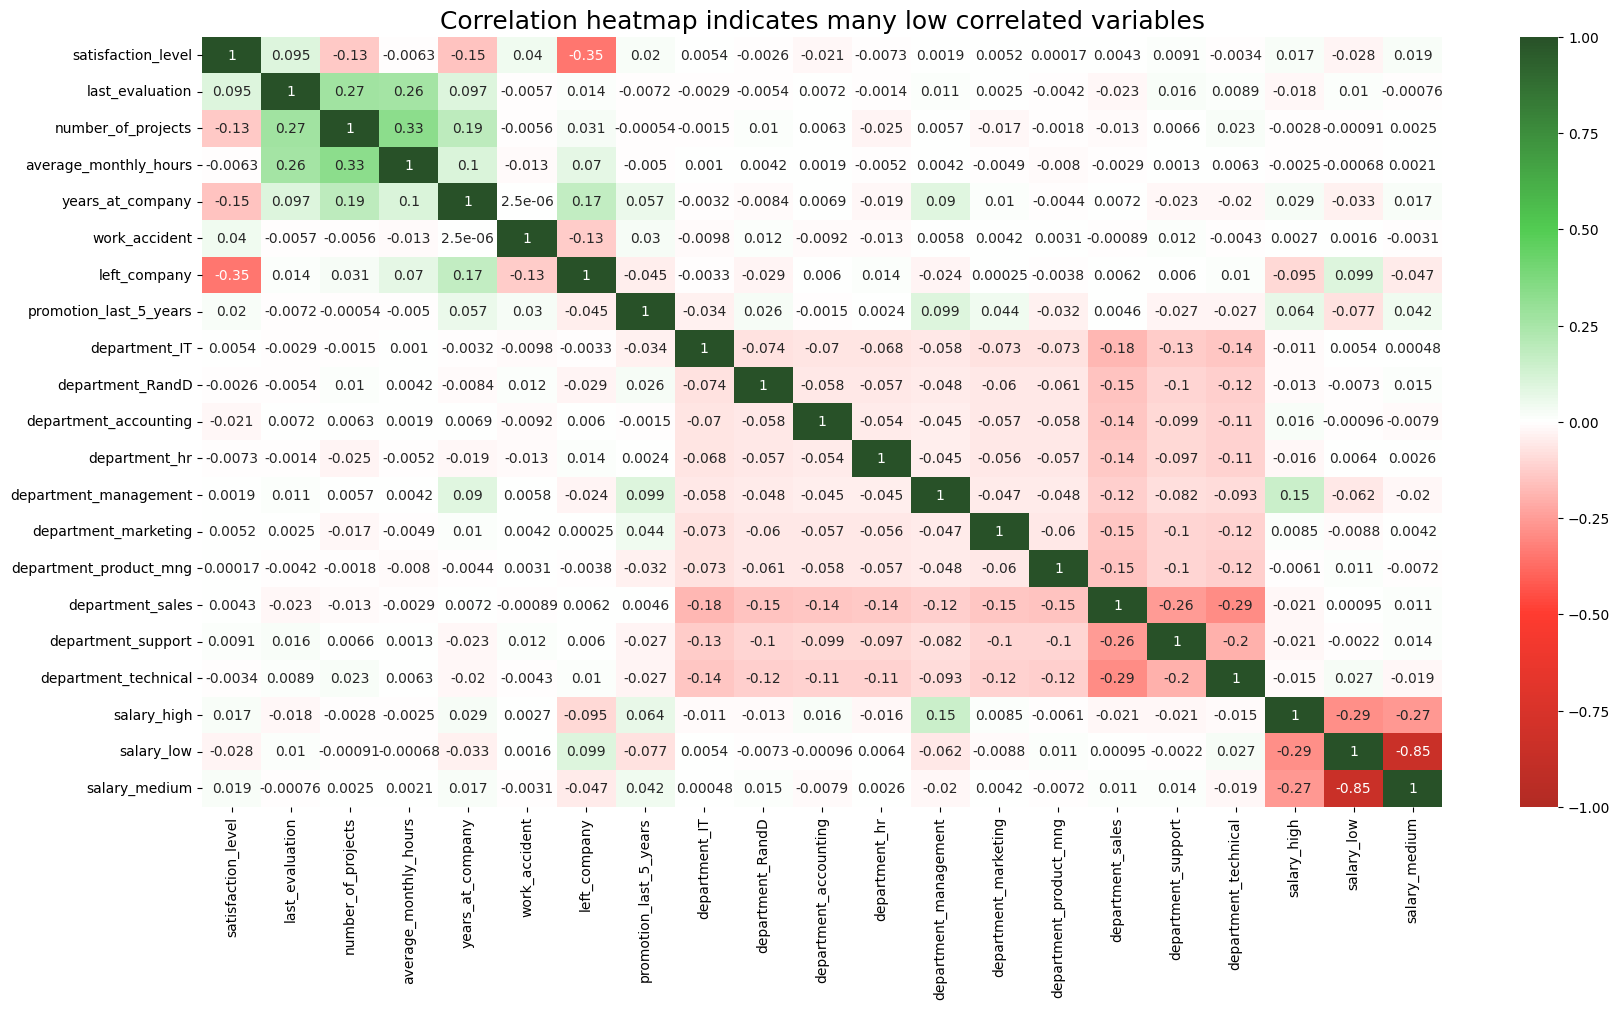

In [84]:
# Create a custom colormap using your colors
colors = [sfmotors_red_darker, sfmotors_red, 'white', sfmotors_green, sfmotors_green_darker]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Plot correlation heatmap with custom colors
plt.figure(figsize=(20, 10))
sns.heatmap(df_model.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap=cmap)
plt.title('Correlation heatmap indicates many low correlated variables', fontsize=18)
plt.show()

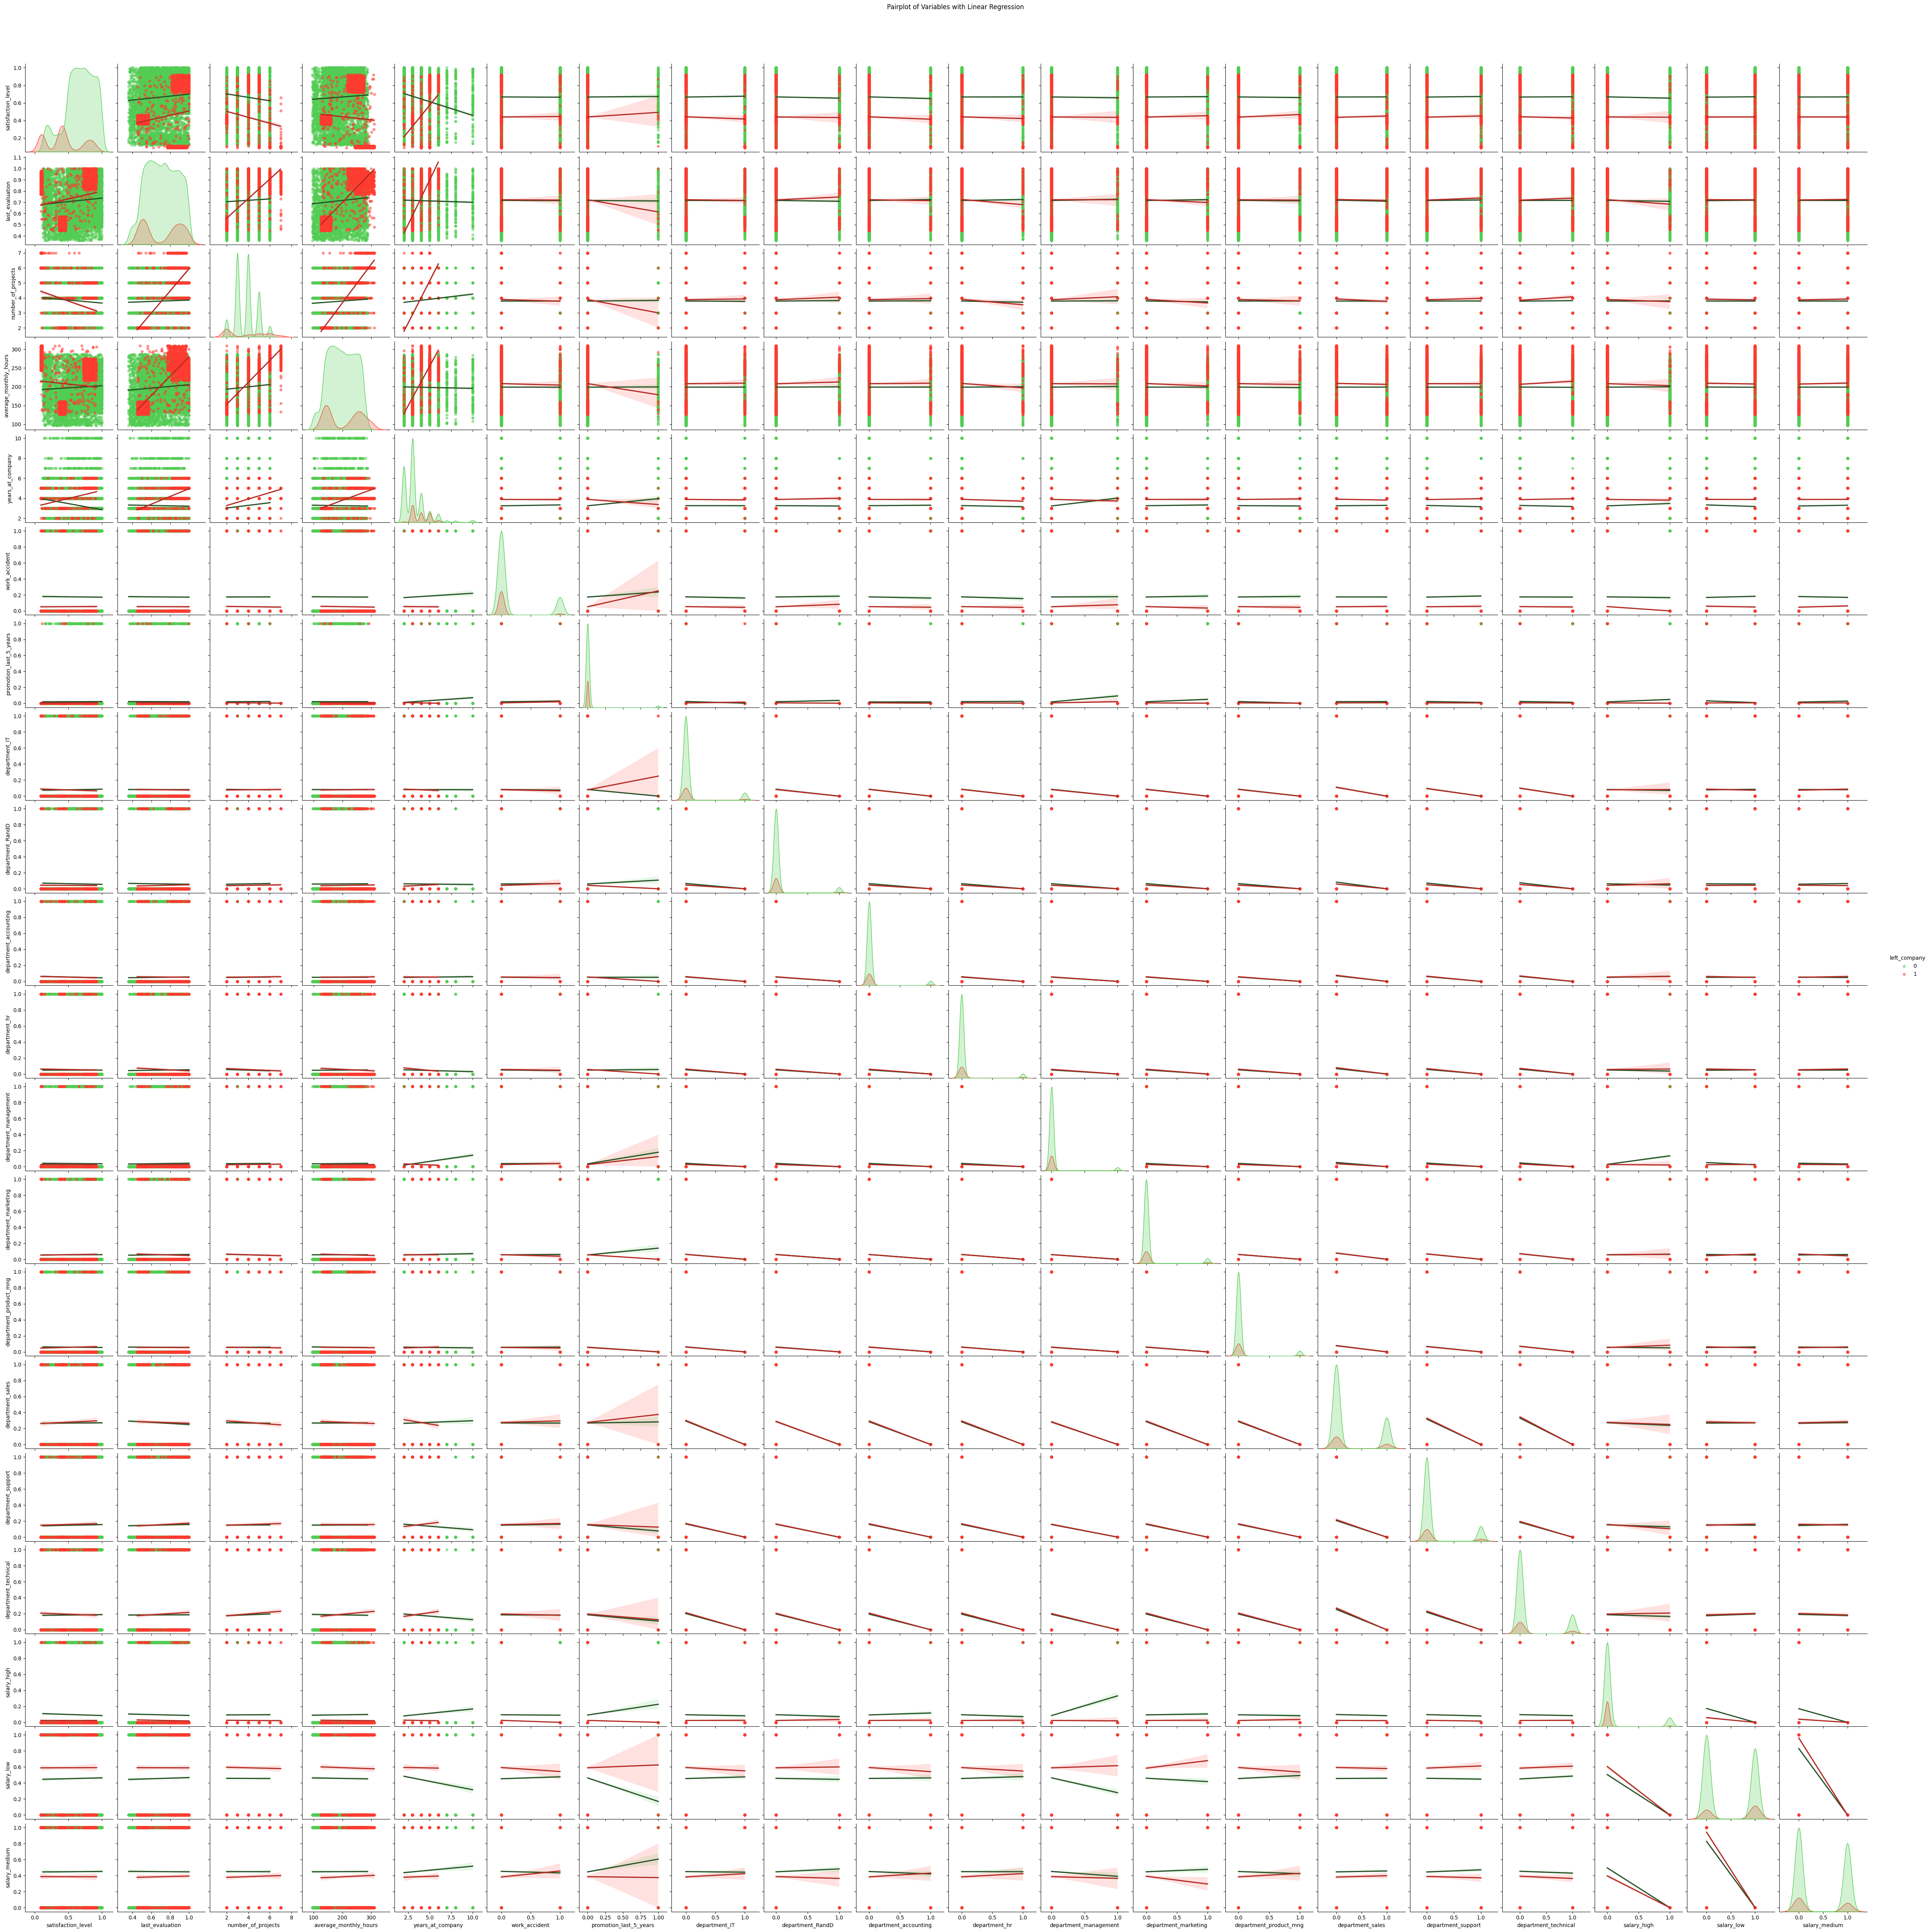

In [85]:
## Create a plot as needed
# Customizing the pairplot with regression lines and round dots
sns.pairplot(df_model, hue='left_company', diag_kind='kde', kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.5, 's': 20}},
             palette={0: sfmotors_green, 1: sfmotors_red})

# Function to convert color strings to RGB tuples
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

# Define a function to check if colors are similar within a tolerance
def colors_are_close(color1, color2, tolerance=30):
    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)
    return np.all(np.abs(np.array(rgb1) - np.array(rgb2)) < tolerance)

# Manually update the regression lines' colors with a tolerance check
for ax in plt.gcf().axes:
    for line in ax.lines:
        if colors_are_close(line.get_color(), sfmotors_green):
            line.set_color(sfmotors_green_darker)
        elif colors_are_close(line.get_color(), sfmotors_red):
            line.set_color(sfmotors_red_darker)

plt.suptitle('Pairplot of Variables with Linear Regression', y=1.02)
plt.show()

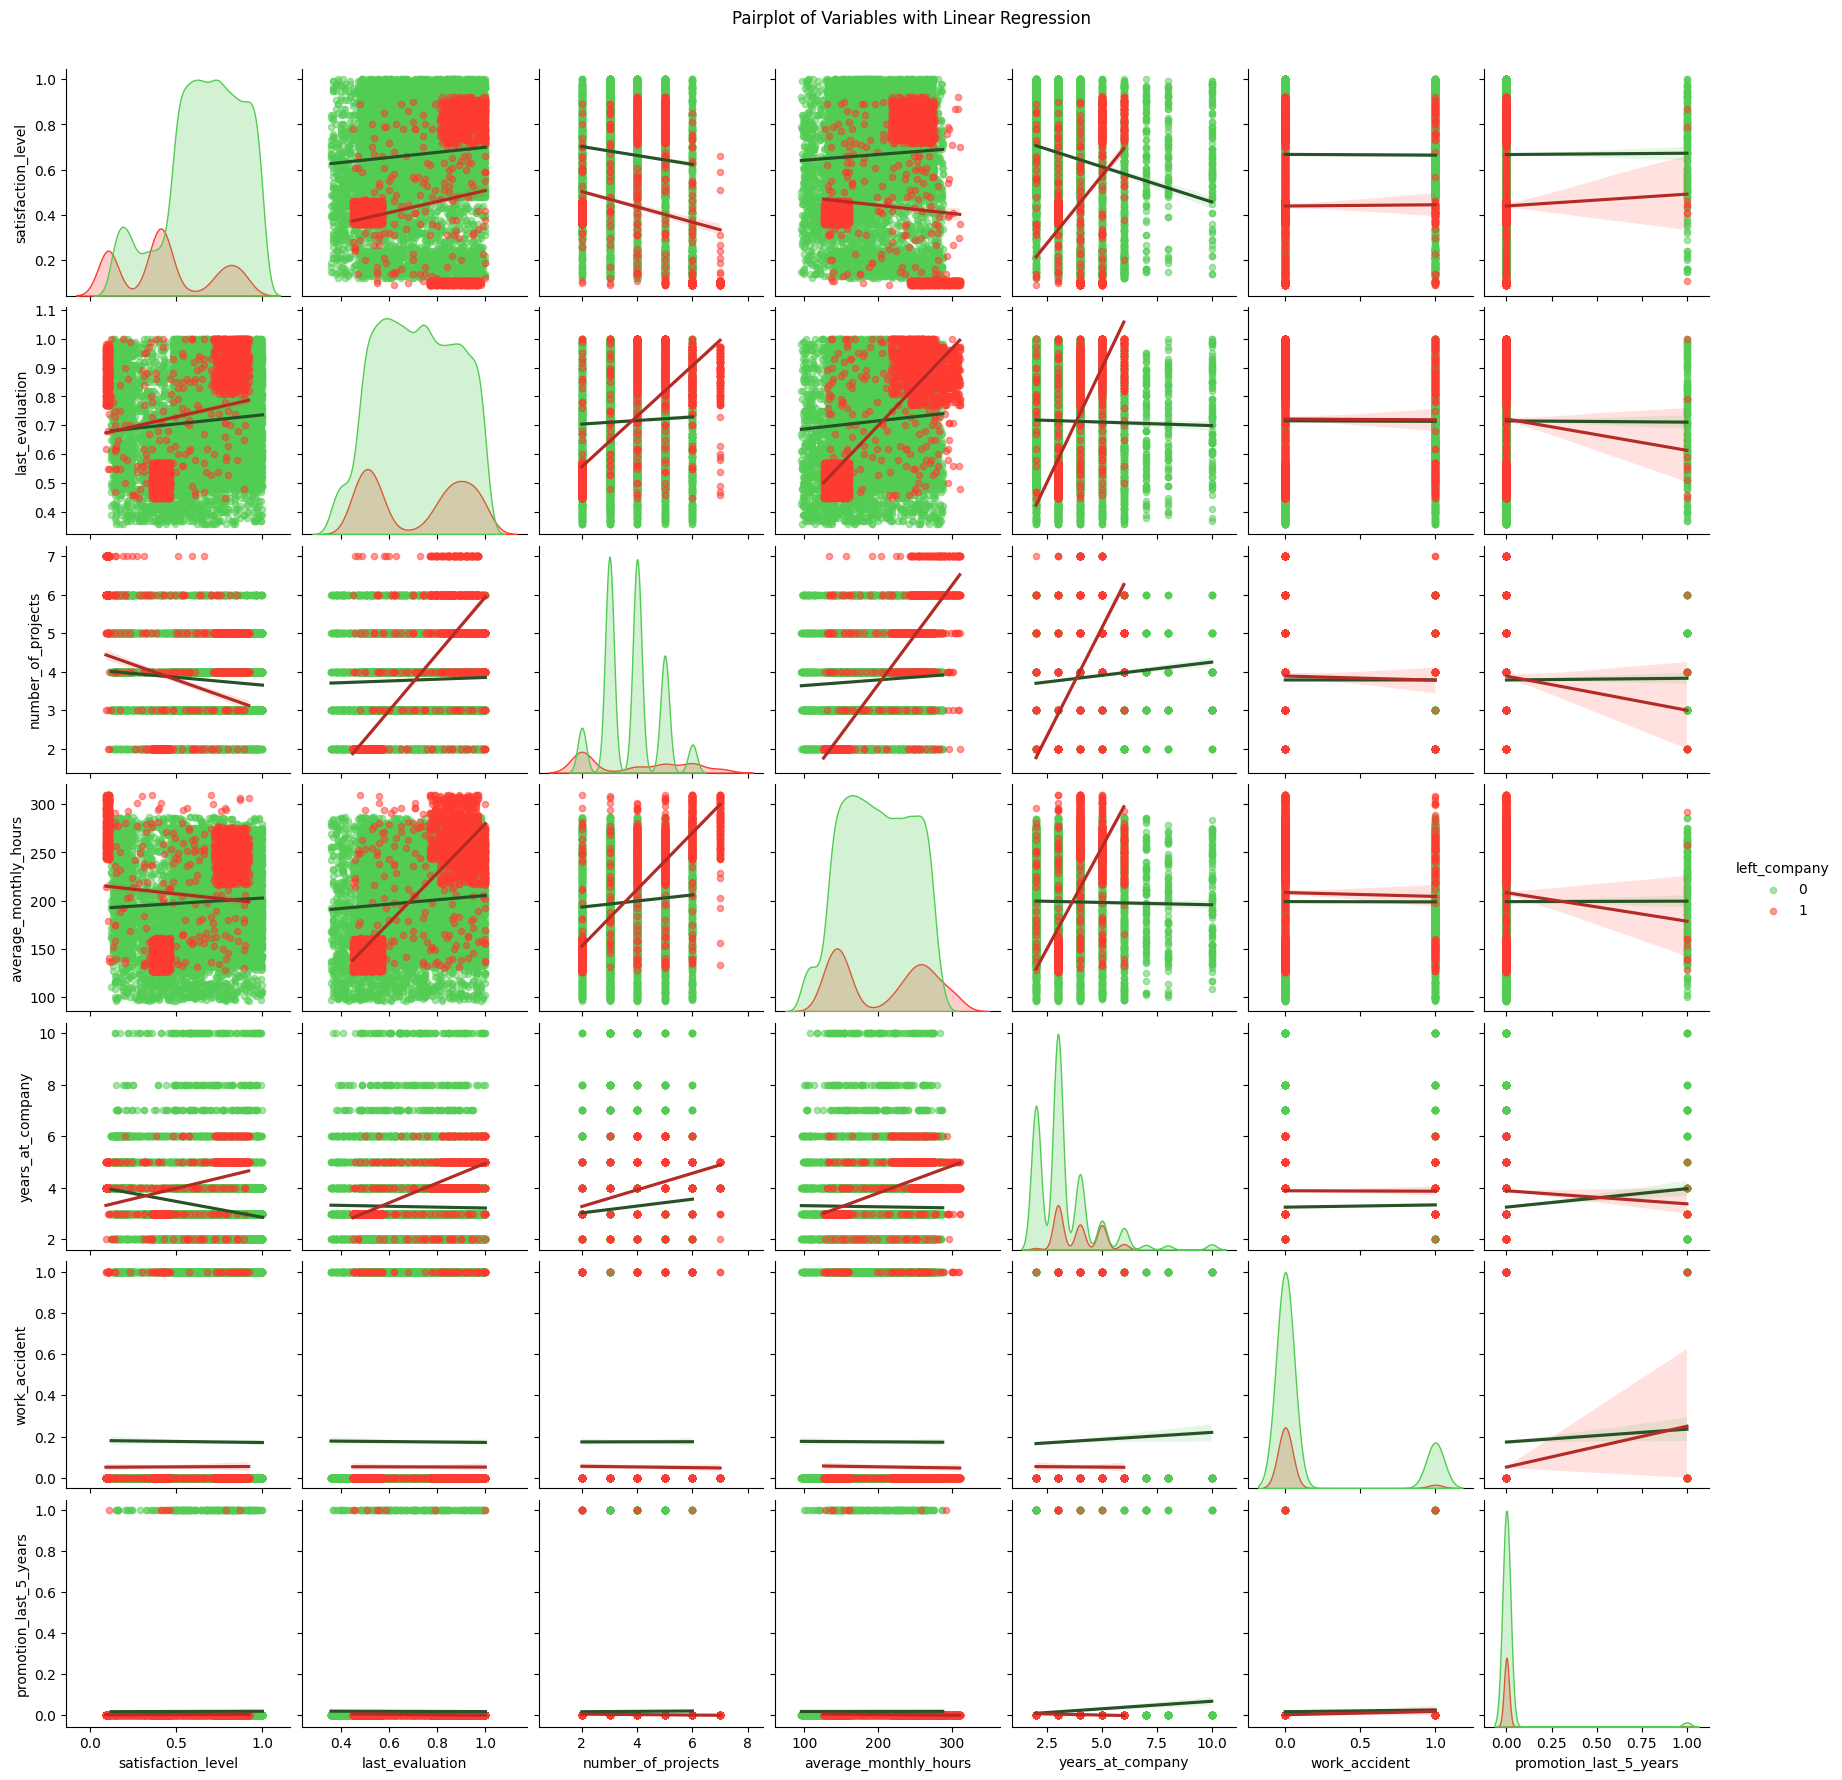

In [86]:
## Create a plot as needed
# Customizing the pairplot with regression lines and round dots
sns.pairplot(df, hue='left_company', diag_kind='kde', kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.5, 's': 20}},
             palette={0: sfmotors_green, 1: sfmotors_red})

# Function to convert color strings to RGB tuples
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

# Define a function to check if colors are similar within a tolerance
def colors_are_close(color1, color2, tolerance=30):
    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)
    return np.all(np.abs(np.array(rgb1) - np.array(rgb2)) < tolerance)

# Manually update the regression lines' colors with a tolerance check
for ax in plt.gcf().axes:
    for line in ax.lines:
        if colors_are_close(line.get_color(), sfmotors_green):
            line.set_color(sfmotors_green_darker)
        elif colors_are_close(line.get_color(), sfmotors_red):
            line.set_color(sfmotors_red_darker)

plt.suptitle('Pairplot of Variables with Linear Regression', y=1.02)
plt.show()

C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


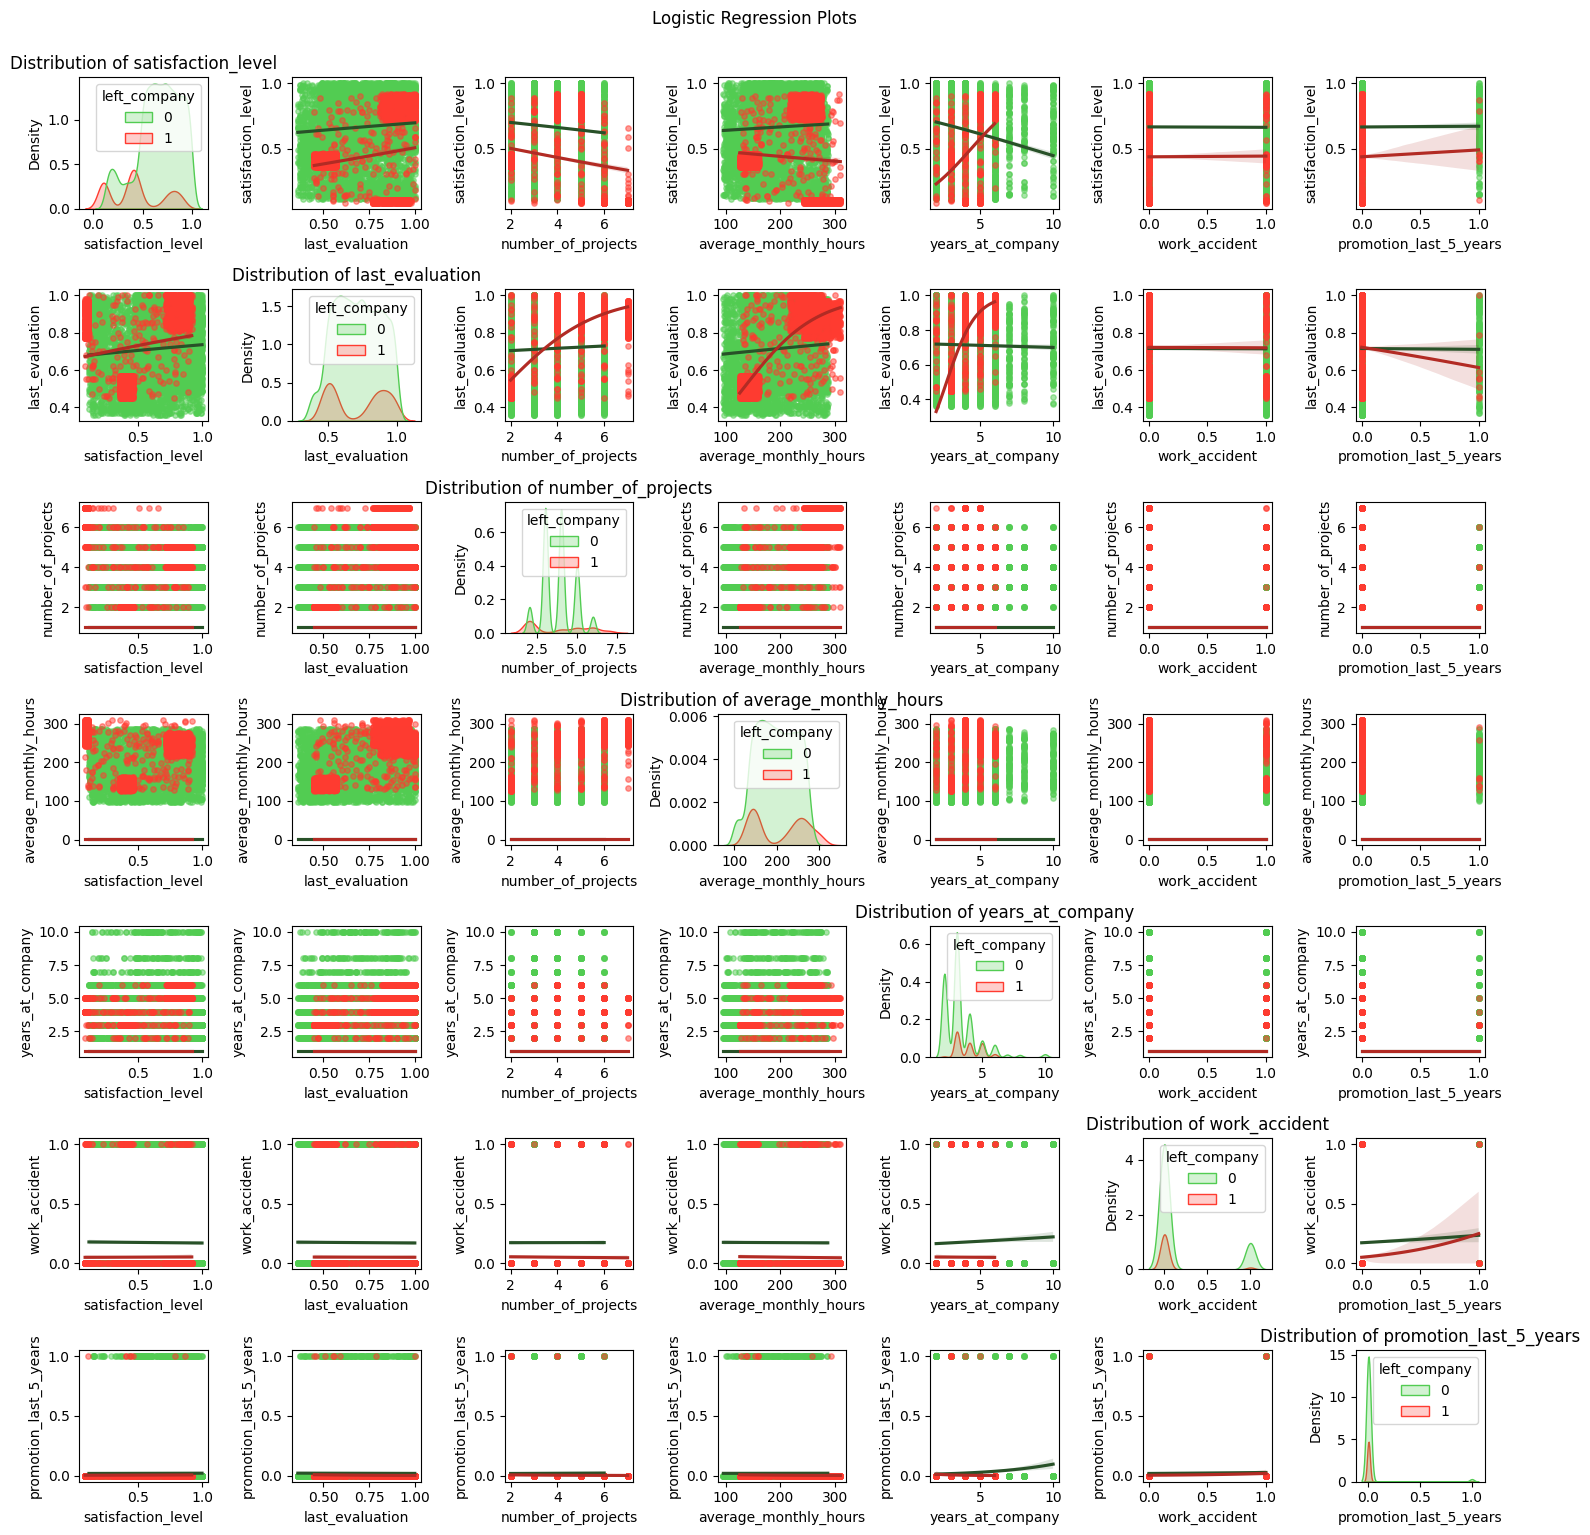

In [87]:
# Create a plot as needed

# List of variables for logistic regression
logistic_vars = ['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company', 'work_accident', 'promotion_last_5_years']

# Create a grid of plots
fig, axes = plt.subplots(len(logistic_vars), len(logistic_vars), figsize=(15, 15))

# Define the order of hue values for plotting (0 before 1)
hue_order = [0, 1]

# Plot logistic regression for each pair of variables
for i, y in enumerate(logistic_vars):
    for j, x in enumerate(logistic_vars):
        ax = axes[i, j]
        if x != y:
            for hue_val in hue_order:
                color = sfmotors_red if hue_val == 1 else sfmotors_green
                darker_color = sfmotors_red_darker if hue_val == 1 else sfmotors_green_darker
                sns.regplot(x=x, y=y, data=df[df['left_company'] == hue_val], logistic=True, ax=ax,
                            scatter_kws={'alpha': 0.5, 's': 15, 'color': color},
                            line_kws={'color': darker_color})
        else:
            sns.kdeplot(data=df, x=x, hue='left_company', ax=ax, fill=True, palette={0: sfmotors_green, 1: sfmotors_red})
            ax.set_title(f'Distribution of {x}')

plt.tight_layout()
plt.suptitle('Logistic Regression Plots', y=1.02)
plt.show()

### Insights

There are some metrics that appear to have a major impact on employee retention.
Among these metrics I highlight: Salary, Number of Projects, Last Evaluation, Number of Years in the company and number of average hours worked in the month.

Satisfaction Level remains a critical predictor for employee turnover.
Years at Company and Number of Projects show weak positive correlations with turnover, indicating they should be included in the predictive model.
Department and Salary Levels provide valuable categorical insights, with specific departments and salary levels indicating varying likelihoods of turnover.
Salary Levels especially show significant correlations with turnover, with low salary employees being more likely to leave, while high salary employees are less likely to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. No anomalies detected; however, monitoring for potential data drift is important.
2. It was selected 10 different variables computing a 1% or more in the influence of the model. Among them it was chosen satisfaction level, number of projects, years at company, average monthly hours, and last evaluation due to their strong correlation with employee turnover.
3. Assumptions regarding data distribution and feature relevance appear to be met, as confirmed by EDA and model validation.
4. The model fits the data well, with high accuracy, precision, recall, and F1 scores.
5. Further improvements could include additional hyperparameter tuning and exploring other model architectures or ensemble methods.
6. Resources include machine learning libraries and documentation (scikit-learn, XGBoost).
7. Ensuring model transparency, fairness, and avoiding discrimination based on sensitive attributes.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.


[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

Random Forest\
XGBoost\
Gradient Boosting\
Logistic Regression\
Support Vector Machine (SVM)\
K-Nearest Neighbors (KNN)\
AdaBoost

### Modeling

Add as many cells as you need to conduct the modeling process.

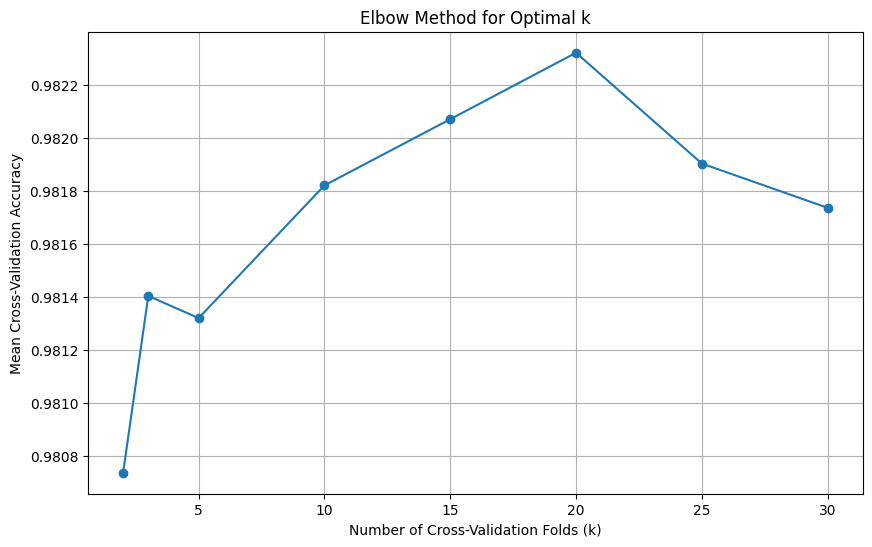

In [88]:
# Interaction between satisfaction_level and salary
df_model['satisfaction_x_salary_high'] = df_model['satisfaction_level'] * df_model['salary_high']
df_model['satisfaction_x_salary_low'] = df_model['satisfaction_level'] * df_model['salary_low']
df_model['satisfaction_x_salary_medium'] = df_model['satisfaction_level'] * df_model['salary_medium']

# Interaction between satisfaction_level and departments
for department in df['department'].unique():
    df_model[f'satisfaction_x_{department}'] = df_model['satisfaction_level'] * df_model[f'department_{department}']

# Define the columns to scale
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_of_projects',
                      'average_monthly_hours', 'years_at_company']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
df_model[numerical_features] = scaler.fit_transform(df_model[numerical_features])

# Define features and target
X = df_model.drop(columns=['left_company'])
y = df_model['left_company']

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Range of k values to test
k_values = [2, 3, 5, 10, 15, 20, 25, 30]

# Store the mean cross-validation scores
mean_scores = []

# Perform cross-validation for each k value
for k in k_values:
    cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
    mean_scores.append(np.mean(cv_scores))

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Cross-Validation Folds (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

In [89]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME')
}

# DataFrame to store results
results_list = []

# Evaluate each model using 15-fold cross-validation
for model_name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=15, scoring=scoring)
    results_list.append({
        'Model': model_name,
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'Precision': np.mean(cv_results['test_precision']),
        'Recall': np.mean(cv_results['test_recall']),
        'F1': np.mean(cv_results['test_f1'])
    })

# Convert results to DataFrame
results = pd.DataFrame(results_list)

In [90]:
# Print the results
results

Model  Accuracy  Precision    Recall        F1
0        Random Forest  0.982070   0.983311  0.907576  0.943721
1              XGBoost  0.982654   0.972763  0.921656  0.946322
2    Gradient Boosting  0.980902   0.959211  0.924656  0.941372
3  Logistic Regression  0.829368   0.504961  0.208947  0.292139
4                  SVM  0.971478   0.919666  0.908586  0.913729
5                  KNN  0.955632   0.841063  0.905077  0.871440
6             AdaBoost  0.942872   0.909285  0.729285  0.808323

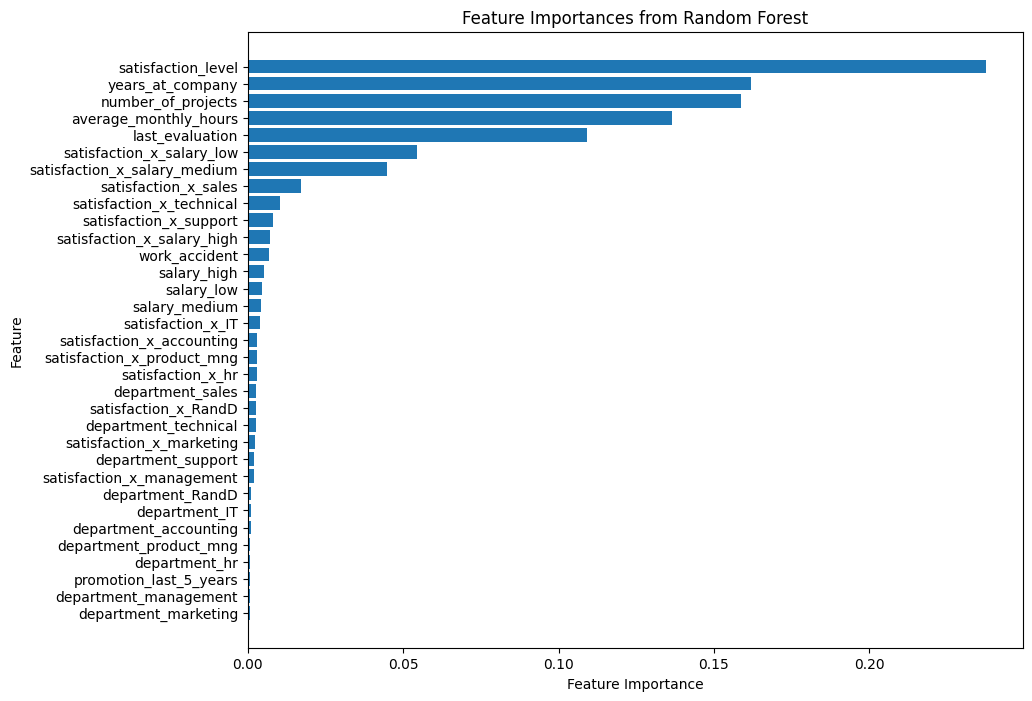

In [91]:
# Assuming the Random Forest model is already trained with X_train and y_train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [92]:
# Clean futures that do not contribute to reduce overfitting

# Set a threshold for feature importance
importance_threshold = 0.01

# Select features above the importance threshold
important_features = feature_importances_df[feature_importances_df['importance'] > importance_threshold]['feature']
print(f"Selected Features: {important_features.tolist()}")


Selected Features: ['satisfaction_level', 'years_at_company', 'number_of_projects', 'average_monthly_hours', 'last_evaluation', 'satisfaction_x_salary_low', 'satisfaction_x_salary_medium', 'satisfaction_x_sales', 'satisfaction_x_technical']


In [93]:
# Test new model with fewer futures

# Select the important features from the dataset
X_selected = X[important_features]

# Split the data into training and test sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# DataFrame to store results
results_list_selected = []

# Evaluate each model using 15-fold cross-validation
for model_name, model in models.items():
    cv_results = cross_validate(model, X_selected, y, cv=15, scoring=scoring)
    results_list_selected.append({
        'Model': model_name,
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'Precision': np.mean(cv_results['test_precision']),
        'Recall': np.mean(cv_results['test_recall']),
        'F1': np.mean(cv_results['test_f1'])
    })

# Convert results to DataFrame
results_selected = pd.DataFrame(results_list_selected)

In [94]:
#Show new selected futures model 
results_selected

Model  Accuracy  Precision    Recall        F1
0        Random Forest  0.984071   0.985129  0.918132  0.950245
1              XGBoost  0.983071   0.976460  0.920650  0.947511
2    Gradient Boosting  0.981236   0.960801  0.925158  0.942398
3  Logistic Regression  0.827785   0.491823  0.195386  0.276470
4                  SVM  0.974647   0.937346  0.908582  0.922487
5                  KNN  0.971979   0.921582  0.909087  0.915067
6             AdaBoost  0.941203   0.907597  0.720202  0.801564

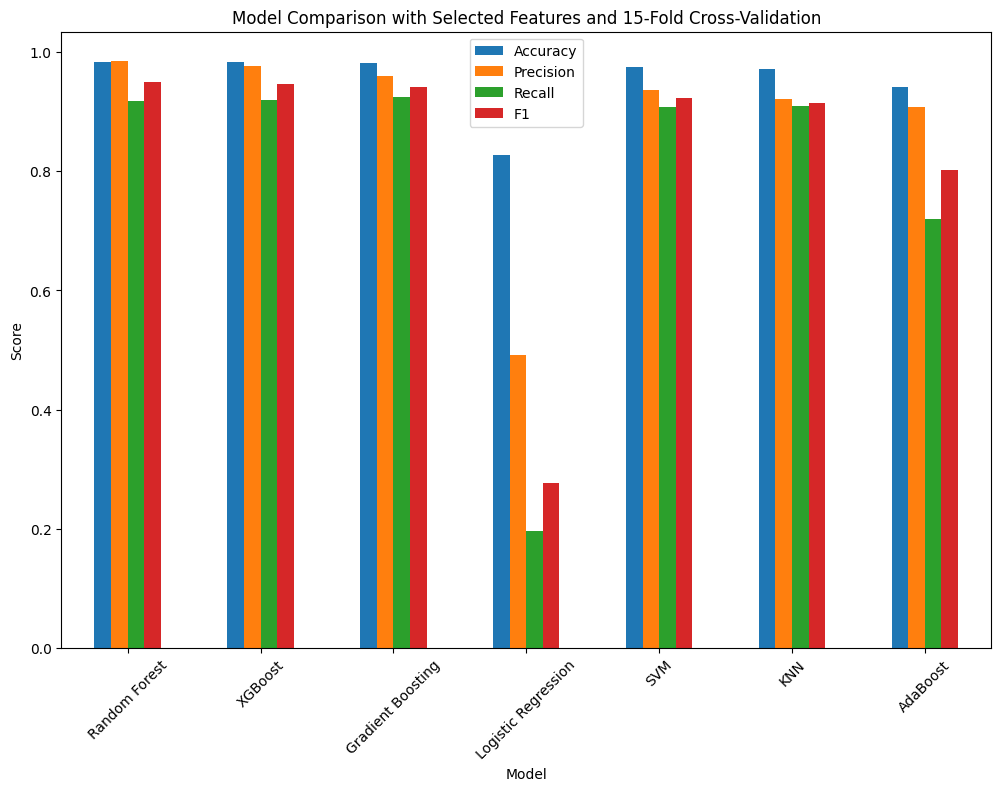

In [95]:

# Plot the results for better visualization
results_selected.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison with Selected Features and 15-Fold Cross-Validation')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [96]:
# Hyperparameter Tuning

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search with 15-fold cross-validation
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=15, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search_rf.fit(X_train_selected, y_train_selected)

# Best parameters and best score
print(f"Best Parameters (RF): {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Score (RF): {grid_search_rf.best_score_}")

# Re-train the model with best parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_selected, y_train_selected)


Best Parameters (RF): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score (RF): 0.986238262910798


RandomForestClassifier(min_samples_split=5, random_state=42)

In [97]:
# Evaluate the Tuned Model

# Predict on the test set with the tuned model
y_pred_tuned = best_rf_model.predict(X_test_selected)
y_pred_proba_tuned = best_rf_model.predict_proba(X_test_selected)[:, 1]

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test_selected, y_pred_tuned)
precision_tuned = precision_score(y_test_selected, y_pred_tuned)
recall_tuned = recall_score(y_test_selected, y_pred_tuned)
f1_tuned = f1_score(y_test_selected, y_pred_tuned)
auc_tuned = roc_auc_score(y_test_selected, y_pred_proba_tuned)

print(f"Tuned Accuracy: {accuracy_tuned}")
print(f"Tuned Precision: {precision_tuned}")
print(f"Tuned Recall: {recall_tuned}")
print(f"Tuned F1 Score: {f1_tuned}")
print(f"Tuned AUC: {auc_tuned}")


Tuned Accuracy: 0.9808253438932889
Tuned Precision: 0.981029810298103
Tuned Recall: 0.9027431421446384
Tuned F1 Score: 0.9402597402597402
Tuned AUC: 0.9734279166947496


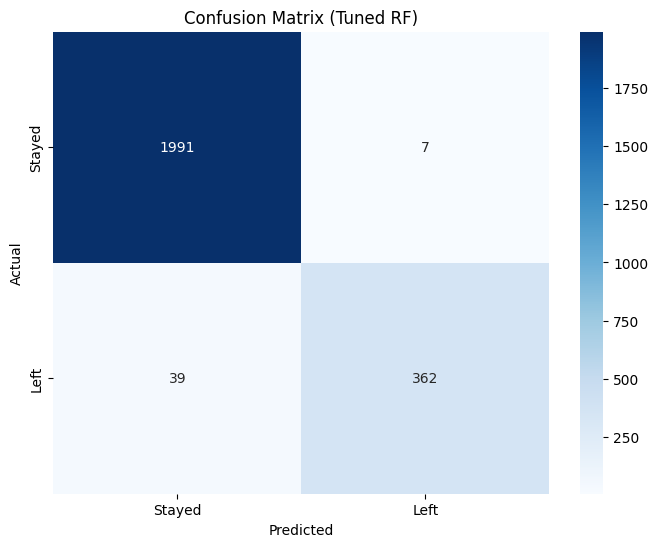

In [98]:
# Plot the confusion matrix
conf_matrix_tuned = confusion_matrix(y_test_selected, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned RF)')
plt.show()

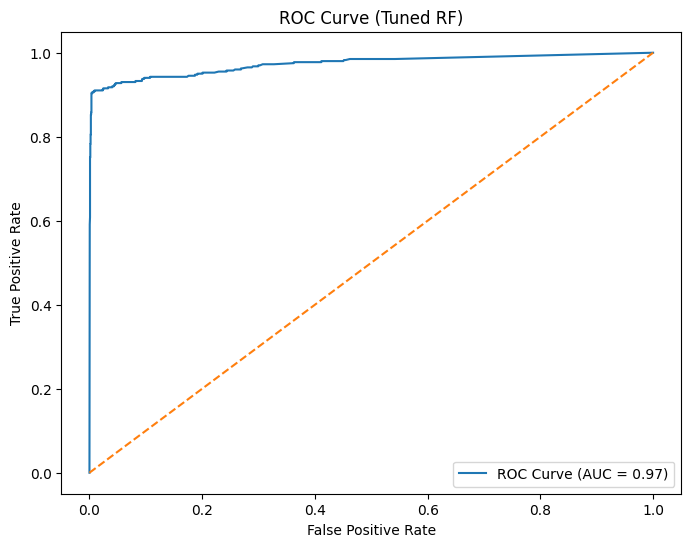

In [99]:
# Plot the ROC curve
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test_selected, y_pred_proba_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f'ROC Curve (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned RF)')
plt.legend()
plt.show()

In [117]:
# Creating SHAP graphics 
# Fit the RandomForest model with the selected features
best_rf_model.fit(X_train_selected, y_train_selected)

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values and SHAP interaction values for the test set
shap_values = explainer.shap_values(X_test_selected)
shap_interaction_values = explainer.shap_interaction_values(X_test_selected)



<Figure size 2000x1000 with 0 Axes>

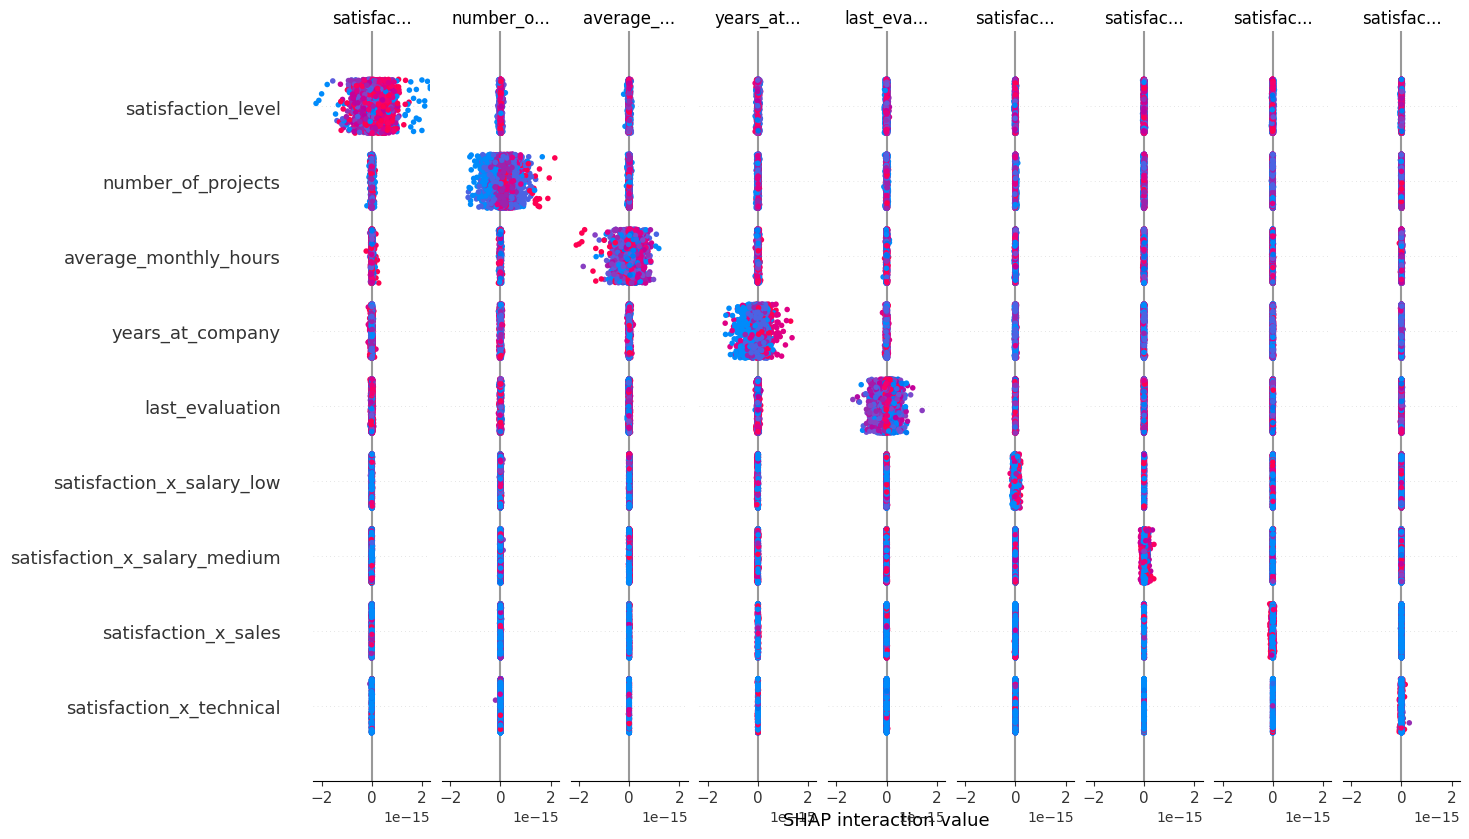

<Figure size 640x480 with 0 Axes>

In [116]:
# Sum interaction values over the last dimension
summed_interaction_values = shap_interaction_values.sum(-1)

# Visualize summed interaction values
plt.figure(figsize=(20, 10))
shap.summary_plot(summed_interaction_values, X_test_selected, plot_type="bar", max_display=20)
plt.tight_layout()
plt.show()

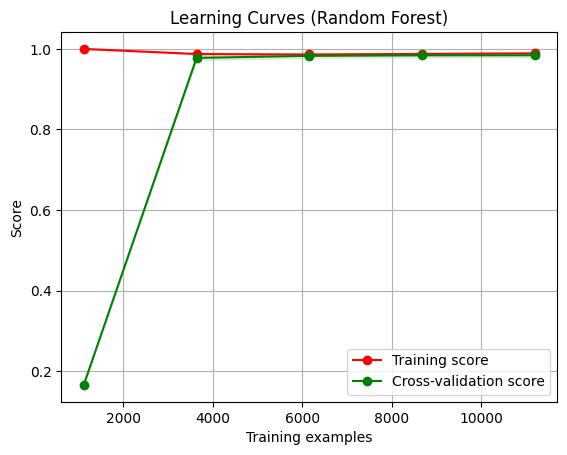

In [101]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curve for RandomForest
plot_learning_curve(best_rf_model, "Learning Curves (Random Forest)", X_selected, y, cv=15)
plt.show()


In [120]:
from alibi_detect.cd import KSDrift
import numpy as np

# Convert the DataFrame to a NumPy array
X_train_selected_np = X_train_selected.values
X_test_selected_np = X_test_selected.values

# Initialize the drift detector with the NumPy array
cd = KSDrift(X_train_selected_np, p_val=0.05)

# Detect drift in the new test set
preds = cd.predict(X_test_selected_np)
print(f"Drift detected: {preds['data']['is_drift']}")


Drift detected: 0


In [47]:
# Save the best model to a file
with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Key factors influencing employee turnover include satisfaction level, number of projects, and years at the company.
2. Focus on improving employee satisfaction and managing workloads to reduce turnover. Implement targeted interventions for employees at risk of leaving.
3. Invest in employee engagement programs, career development opportunities, and workload management systems to improve retention.
4. The model could be improved with more data, additional features, or advanced ensemble methods. Continuous monitoring for data drift and model retraining will also help maintain performance.
5. Investigate the impact of other factors such as management style, team dynamics, and external job market conditions on employee turnover.
6. Resources include data analysis and machine learning libraries, as well as research papers on employee turnover.
7. Ensuring that the model is used ethically and that predictions do not lead to unfair treatment of employees.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

1. The model interprets employee turnover risk based on key features such as satisfaction level and workload.
2. The model shows high performance with metrics indicating strong predictive power and reliability.
3. Results include accuracy, precision, recall, F1 score, AUC, and visualizations such as ROC curve and confusion matrix.

### Conclusion, Recommendations, Next Steps

1. The predictive model effectively identifies employees at risk of leaving, allowing for proactive management interventions.
2. Implement strategies to improve employee satisfaction and manage workloads. Continuously monitor model performance and update it as needed.
3. Integrate the model into HR systems for real-time predictions, conduct further research on additional factors affecting turnover, and continuously improve the model based on new data and insights.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.